![Sunset_in_Africa](Sunset_in_Africa.jpg)


# [ ![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg) ](https://nbviewer.org/github/alisonnanjez/African-Growth-Stories/blob/main/notebook.ipynb)

## Introduction
Obtained from Kaggle [source](https://www.kaggle.com/datasets/stealthtechnologies/gdp-growth-of-african-countries), this dataset provides the GDP of African countries in US Dollars from 1960 to 2023. However, this analysis will specifically focus on identifying clusters of countries with similar GDP growth patterns within the 2000-2023 timeframe.

## The Data

In [1]:
import pandas as pd

Africa = pd.read_csv("Africa_GDP.csv")

print(Africa.shape)

print(Africa.info())

display(Africa)

(64, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   Algeria                   64 non-null     float64
 2   Benin                     64 non-null     float64
 3   Botswana                  64 non-null     float64
 4   Burkina Faso              64 non-null     float64
 5   Burundi                   64 non-null     float64
 6   Cameroon                  64 non-null     float64
 7   Central African Republic  64 non-null     float64
 8   Chad                      64 non-null     float64
 9   Eswatini                  64 non-null     float64
 10  Ethiopia                  64 non-null     float64
 11  Gabon                     64 non-null     float64
 12  Ghana                     64 non-null     float64
 13  Kenya                     64 non-null     float64
 14  Les

,Year,Algeria,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Eswatini,Ethiopia,Gabon,Ghana,Kenya,Lesotho,Liberia,Libya,Madagascar,Mauritius,Morocco,Niger,Nigeria,Rwanda,Senegal,Seychelles,Sierra Leone,Somalia,South Africa,Sudan,Tanzania,Togo,Uganda,Zambia,Zimbabwe
0,1960,2.723615e+09,2.261956e+08,3.041141e+07,3.304428e+08,1.960000e+08,6.142061e+08,1.121556e+08,3.135827e+08,3.507685e+07,1.610512e+09,1.414690e+08,1.223944e+09,7.912655e+08,3.457999e+07,1.904956e+08,4.016442e+08,6.730817e+08,1.620896e+08,2.037155e+09,4.495269e+08,4.196175e+09,1.190000e+08,1.003692e+09,1.201202e+07,3.221515e+08,1.804599e+08,8.748597e+09,1.127011e+09,2.651730e+09,1.710571e+08,4.230084e+08,7.130000e+08,1.052990e+09
1,1961,2.434747e+09,2.356682e+08,3.290261e+07,3.502472e+08,2.030000e+08,6.527776e+08,1.231346e+08,3.339753e+08,4.302604e+07,1.680860e+09,1.676379e+08,1.309859e+09,7.929595e+08,3.569999e+07,1.839209e+08,4.439056e+08,6.991619e+08,1.917577e+08,2.025694e+09,4.857852e+08,4.467288e+09,1.220000e+08,1.058975e+09,1.159202e+07,3.279792e+08,1.916599e+08,9.225996e+09,1.223563e+09,2.826179e+09,1.784971e+08,4.415241e+08,6.962857e+08,1.096647e+09
2,1962,2.001445e+09,2.364350e+08,3.564496e+07,3.795671e+08,2.135000e+08,6.942479e+08,1.244828e+08,3.576357e+08,4.592796e+07,1.747566e+09,1.827965e+08,1.390141e+09,8.681114e+08,4.185998e+07,1.918618e+08,6.197258e+08,7.392869e+08,1.977382e+08,2.379611e+09,5.317366e+08,4.909399e+09,1.250000e+08,1.085476e+09,1.264203e+07,3.428727e+08,2.035319e+08,9.813996e+09,1.329023e+09,3.101590e+09,1.867458e+08,4.490126e+08,6.931429e+08,1.117602e+09
3,1963,2.702982e+09,2.539277e+08,3.809184e+07,3.940407e+08,2.327500e+08,7.183208e+08,1.293791e+08,3.717670e+08,5.412944e+07,1.825059e+09,1.544802e+08,1.549296e+09,9.265893e+08,4.703998e+07,2.002296e+08,8.923279e+08,7.593459e+08,2.538396e+08,2.657253e+09,5.862949e+08,5.165590e+09,1.280000e+08,1.122140e+09,1.392303e+07,3.487007e+08,2.161459e+08,1.085420e+10,1.352011e+09,3.456579e+09,2.023059e+08,5.161478e+08,7.187143e+08,1.159512e+09
4,1964,2.909316e+09,2.698190e+08,4.161635e+07,4.103216e+08,2.607500e+08,7.766502e+08,1.420251e+08,3.922475e+08,6.498055e+07,1.984129e+09,2.156799e+08,1.740845e+09,9.987593e+08,5.193998e+07,2.189291e+08,1.341395e+09,8.024822e+08,2.189146e+08,2.798345e+09,5.828164e+08,5.552931e+09,1.300000e+08,1.188931e+09,1.539303e+07,3.720121e+08,2.295299e+08,1.195600e+10,1.389080e+09,3.748841e+09,2.345722e+08,5.890566e+08,8.394286e+08,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,1.934600e+11,1.439071e+10,1.672591e+10,1.603281e+10,2.576519e+09,3.966776e+10,2.221301e+09,1.131495e+10,4.495267e+09,9.591261e+10,1.687441e+10,6.833797e+10,1.003780e+11,2.390702e+09,3.319596e+09,7.208196e+10,1.410466e+10,1.443635e+10,1.289200e+11,1.288956e+10,4.745170e+11,1.034930e+10,2.340400e+10,1.868690e+09,4.076579e+09,9.420431e+09,3.893300e+11,3.233808e+10,6.102673e+10,6.992700e+09,3.534816e+10,2.330867e+10,2.183223e+10
60,2020,1.648730e+11,1.568674e+10,1.496029e+10,1.772501e+10,2.649680e+09,4.077324e+10,2.326721e+09,1.071540e+10,3.982237e+09,1.076580e+11,1.531458e+10,7.004310e+10,1.006580e+11,2.053338e+09,3.176126e+09,6.568845e+10,1.305144e+10,1.140811e+10,1.213540e+11,1.374465e+10,4.321990e+11,1.017439e+10,2.453051e+10,1.382552e+09,4.062906e+09,9.204140e+09,3.382910e+11,2.703459e+10,6.606874e+10,7.400284e+09,3.760037e+10,1.813776e+10,2.150970e+10
61,2021,1.862650e+11,1.768762e+10,1.875095e+10,1.964317e+10,2.775799e+09,4.499352e+10,2.516498e+09,1.177998e+10,4.850843e+09,1.112620e+11,2.021795e+10,7.952442e+10,1.097040e+11,2.406781e+09,3.513050e+09,4.778679e+10,1.455475e+10,1.148435e+10,1.418180e+11,1.491500e+10,4.408390e+11,1.106928e+10,2.752078e+10,1.487174e+09,4.249235e+09,9.838712e+09,4.201180e+11,3.422951e+10,7.065563e+10,8.342244e+09,4.052979e+10,2.209642e+10,2.837124e+10
62,2022,2.255600e+11,1.742542e+10,2.032196e+10,1.882022e+10,3.338723e+09,4.3

The data consists of 64 rows (years) and 34 columns (African countries), holding GDP values. With no missing data, the initial wide format will be transformed through transposing for modeling. Additionally, scaling is essential to prevent features with larger magnitudes (i.e., later years with higher GDP) from dominating the distance calculations in the clustering algorithm.

## Preprocessing and finding the value for n_clusters

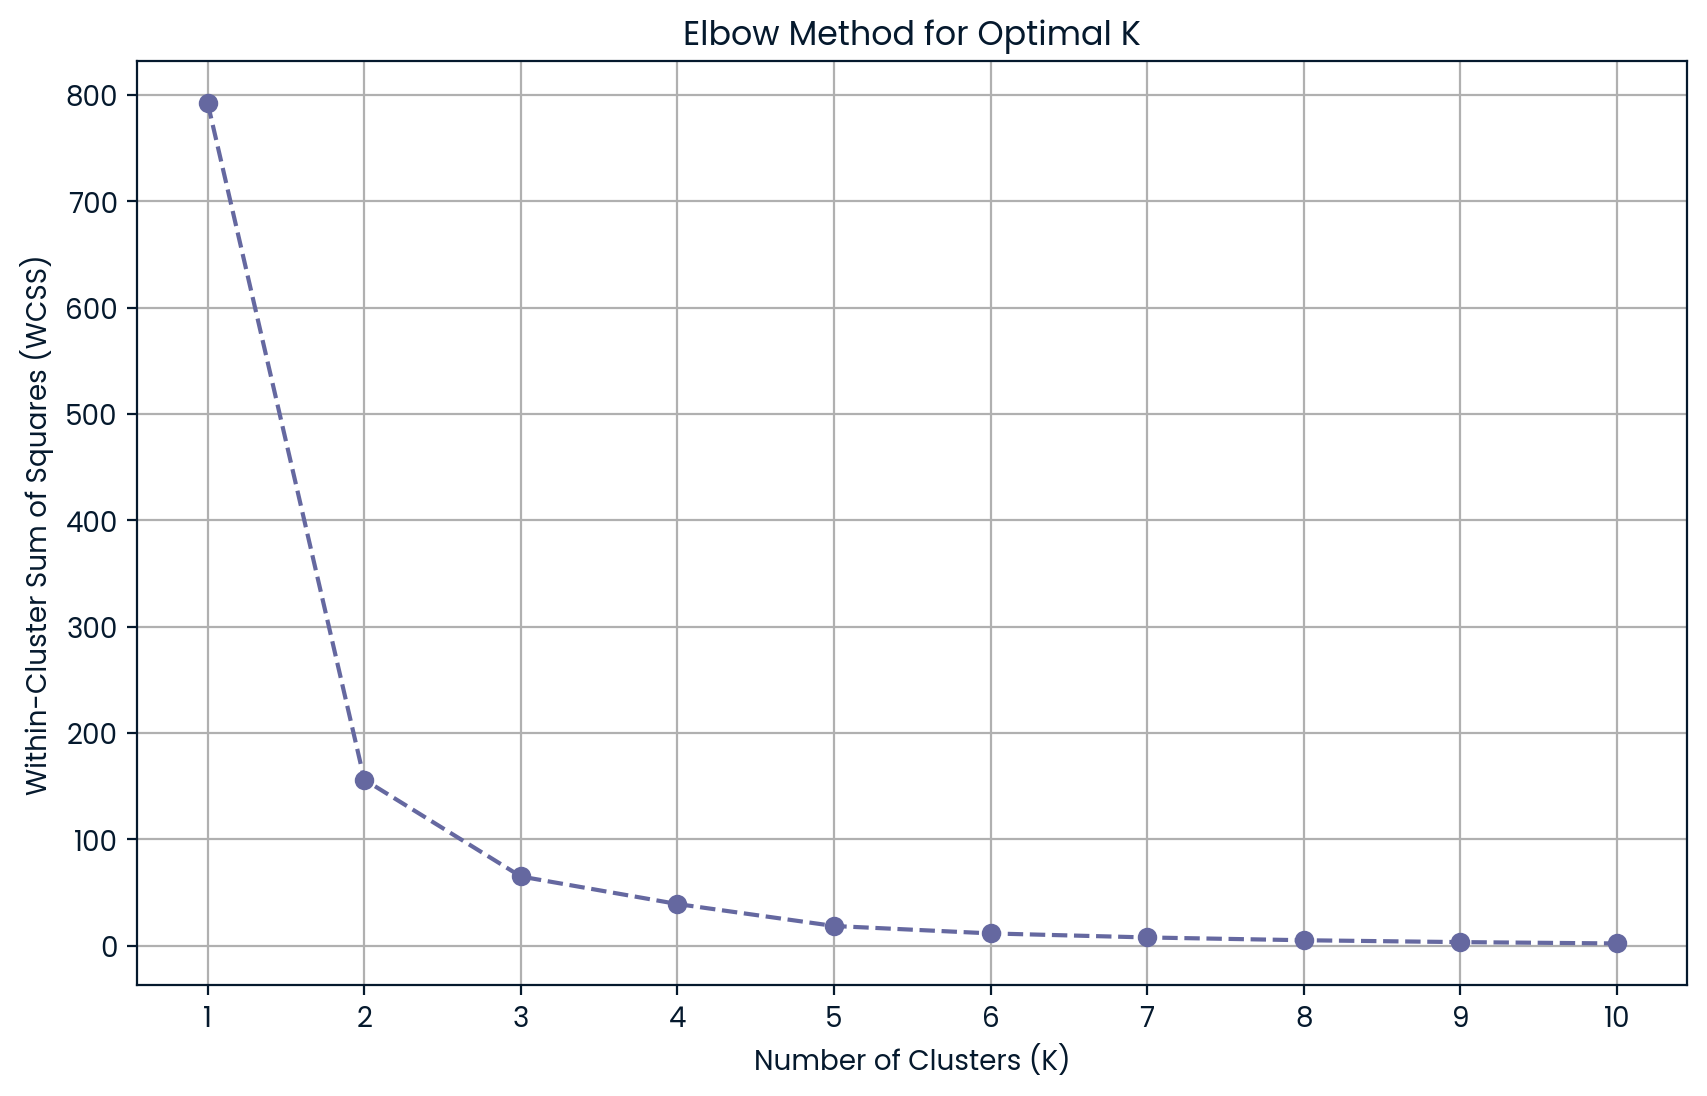

In [2]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from  sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

#Filter the years to be between 2000 - 2023
start_year = 2000
end_year = 2023

Africa = Africa[(Africa['Year'] >= start_year) & (Africa['Year'] <= end_year)]

#Define a list containing the country names
Country = ["Algeria","Benin","Botswana","Burkina Faso","Burundi","Cameroon","Central African Republic","Chad",	"Eswatini","Ethiopia","Gabon","Ghana","Kenya","Lesotho","Liberia","Libya","Madagascar","Mauritius","Morocco",	"Niger","Nigeria","Rwanda","Senegal","Seychelles","Sierra Leone","Somalia","South Africa","Sudan","Tanzania",	"Togo","Uganda","Zambia","Zimbabwe"]

new_africa = Africa.set_index('Year')[Country]

#Transpose
new_africa = new_africa.T


#Now the modelling bit can begin

#Instatiate the scaler
scaler = StandardScaler()

# Scale your data
scaled_africa = scaler.fit_transform(new_africa)

#Create a range of possible number of clusters (k values) to test
k_range = range(1, 11)  # You can adjust the upper limit as needed

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each k
wcss = []

# Iterate through the range of k values
for k in k_range:
    # a. Create a KMeans model for the current k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # b. Fit the KMeans model to the *scaled* data
    kmeans.fit(scaled_africa)

    # c. Get the WCSS for the current k
    wcss.append(kmeans.inertia_)

#Plot the WCSS values against the number of clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()



From the visualization above it looks like the "elbow" of the line is at 3. This means that using 3 groups probably gives us a good way to separate the countries without making too many groups.

## Application of KMeans Algorithm

In [3]:
# After examining the plot, determine your optimal 'n_clusters' value
optimal_k = 3

#Now you can create your final pipeline with the chosen number of clusters
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42, n_init=10))
])

#Fit the final pipeline to your data
pipeline.fit(new_africa)

# Get the cluster labels
cluster_labels = pipeline.predict(new_africa)
print(cluster_labels)

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 1 0 0 0 0 0 0]


## Visualizations of the clusters

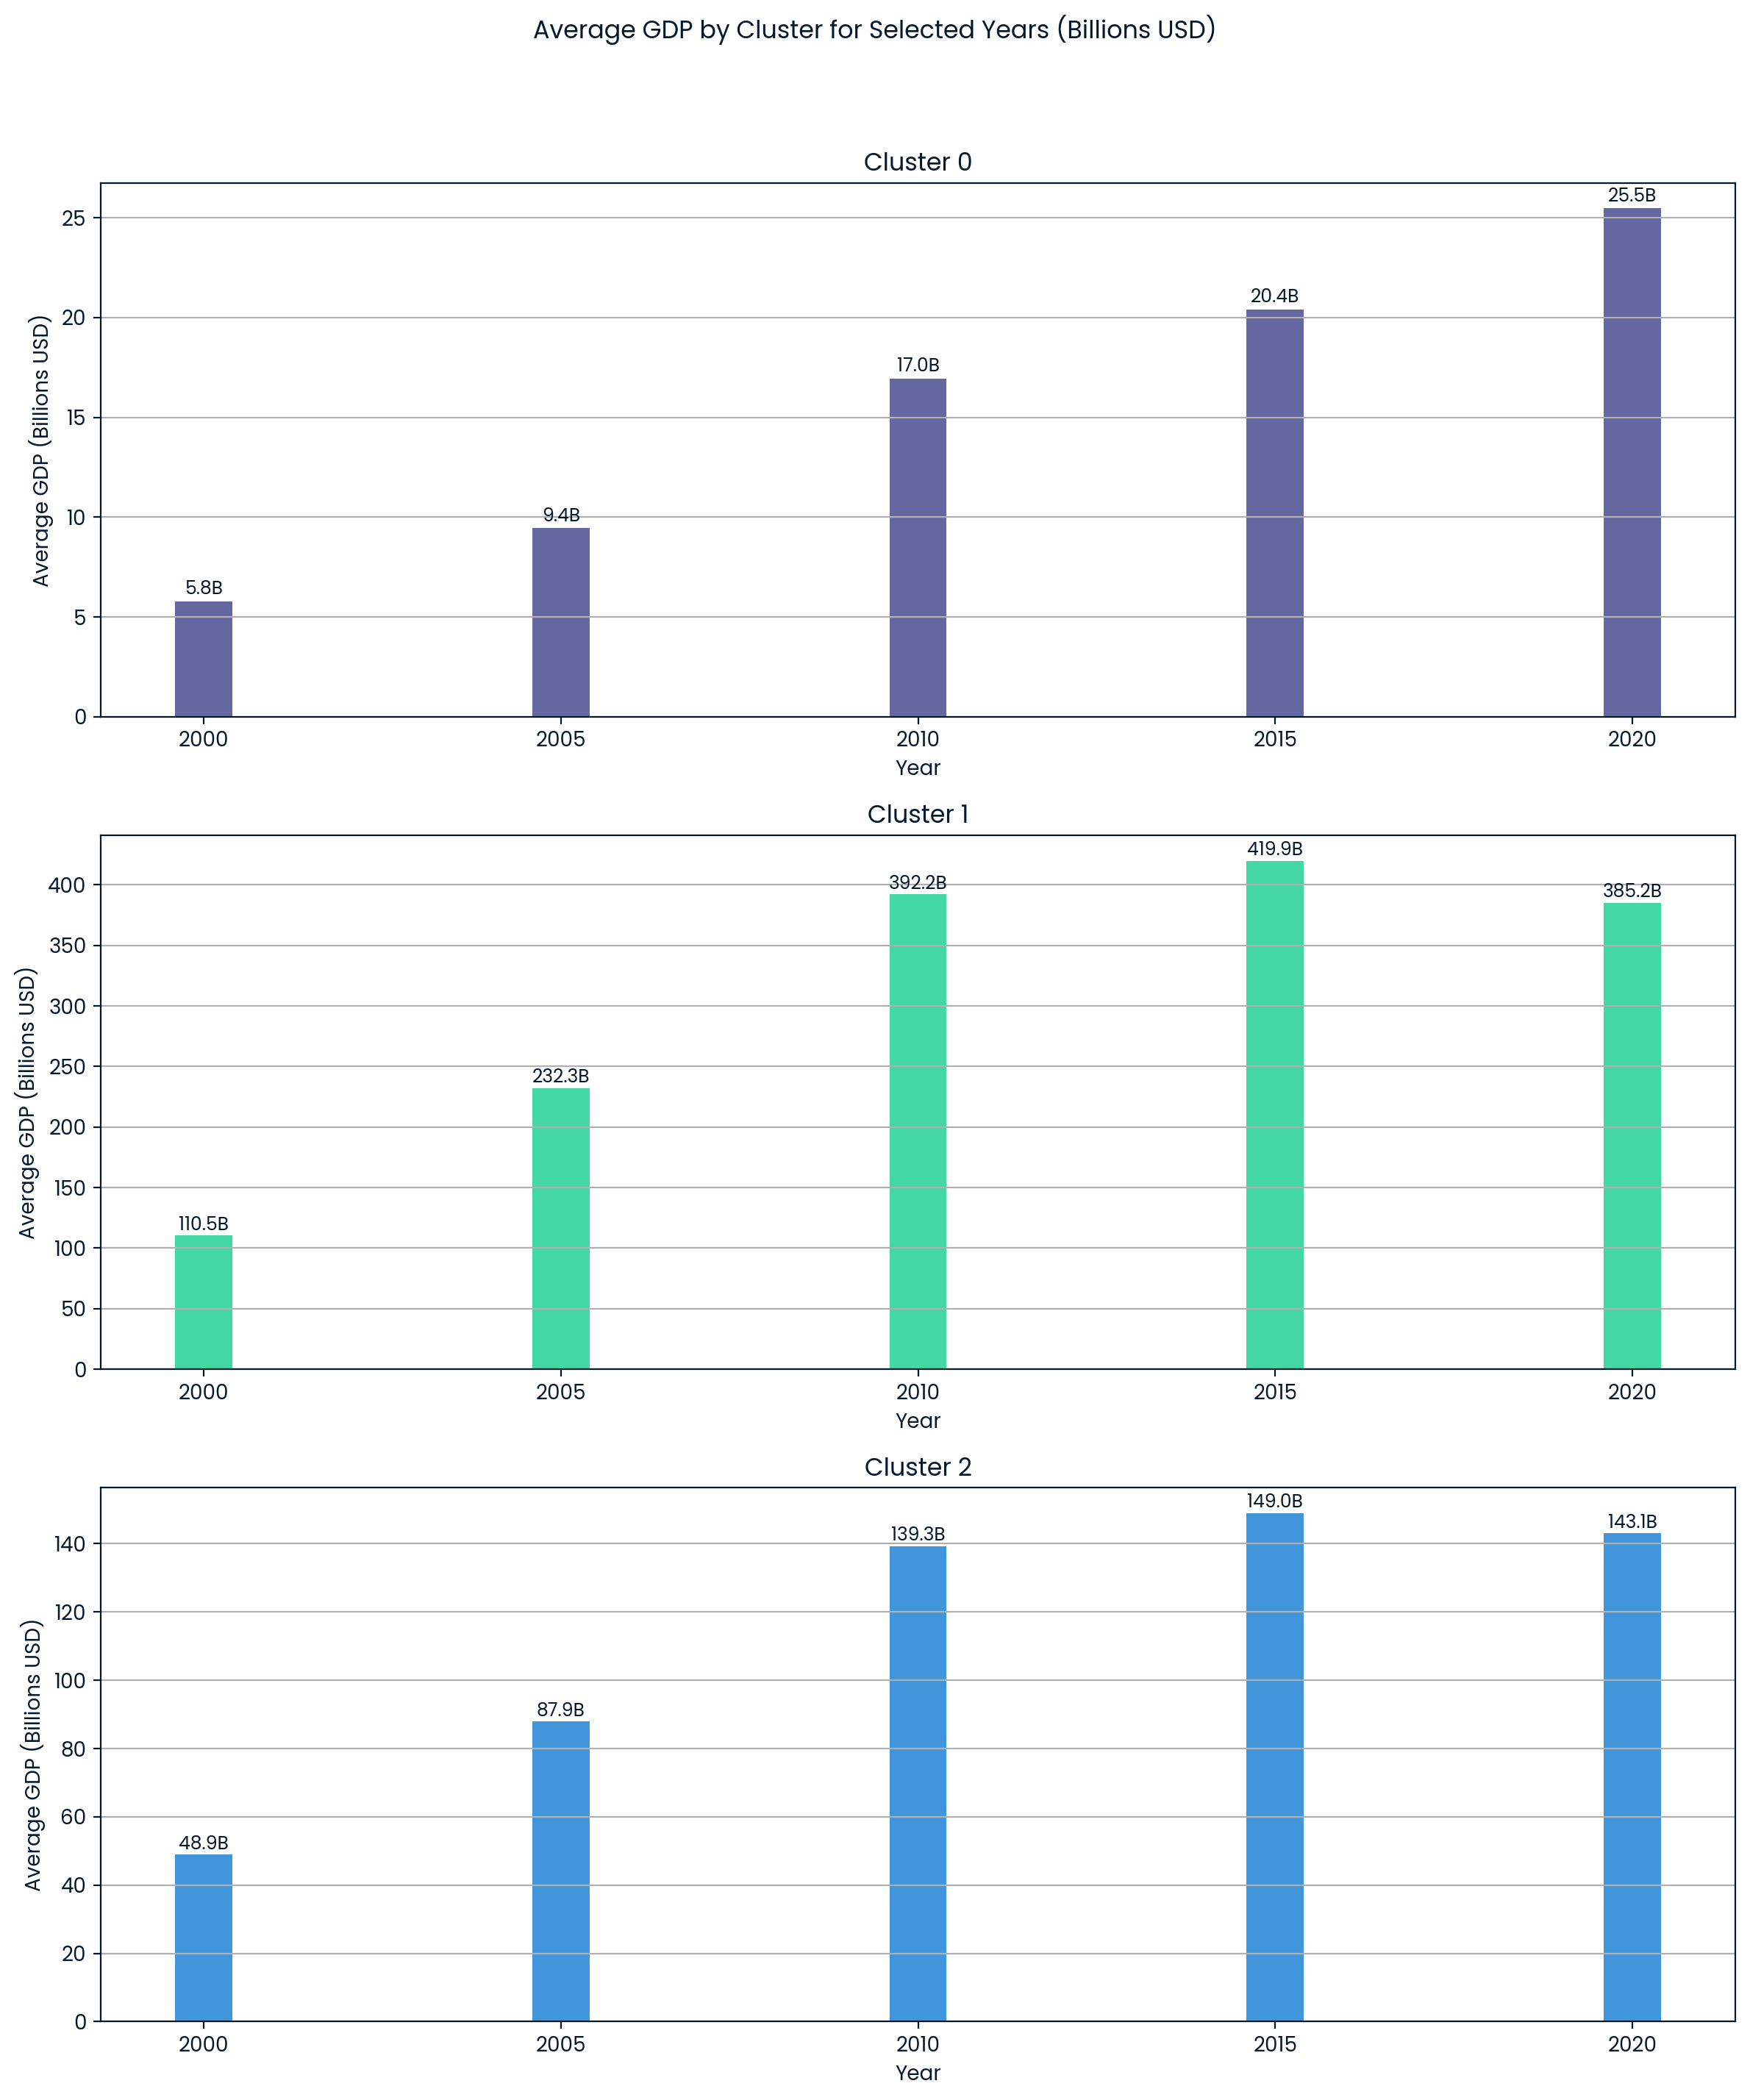


Countries Belonging to Each Cluster:
Cluster 0: Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Eswatini, Ethiopia, Gabon, Ghana, Kenya, Lesotho, Liberia, Libya, Madagascar, Mauritius, Niger, Rwanda, Senegal, Seychelles, Sierra Leone, Somalia, Sudan, Tanzania, Togo, Uganda, Zambia, Zimbabwe
Cluster 1: Nigeria, South Africa
Cluster 2: Algeria, Morocco


In [4]:
# Create a DataFrame to store the cluster labels for each country
cluster_df = pd.DataFrame({'Country': new_africa.index, 'Cluster': cluster_labels})
cluster_df = cluster_df.set_index('Country')

# Merge the cluster labels back with the original GDP data (transposed)
clustered_africa = new_africa.merge(cluster_df, left_index=True, right_index=True)

# Get the list of years (columns in your 'new_africa' DataFrame)
years = new_africa.columns

# Visualize GDP trends for each cluster

# Convert GDP to billions (assuming original values are in USD)
gdp_billions = new_africa / 1_000_000_000

#Define the years you want to visualize with bar plots
selected_years = [2000, 2005, 2010, 2015, 2020]

#Create the figure and subplots
fig, axes = plt.subplots(nrows=optimal_k, ncols=1, figsize=(12, 5 * optimal_k), sharey=False) # sharey=False for original scale
fig.suptitle('Average GDP by Cluster for Selected Years (Billions USD)')

#Iterate through each cluster and create a bar plot for the selected years
for cluster_num in range(optimal_k):
    cluster_countries_df_billions = gdp_billions.loc[clustered_africa[clustered_africa['Cluster'] == cluster_num].index]
    average_gdp_billions = cluster_countries_df_billions[selected_years].mean(axis=0)

    ax = axes[cluster_num]
    bars = ax.bar(selected_years, average_gdp_billions, color=[f'C{cluster_num}'] * len(selected_years))
    ax.set_title(f'Cluster {cluster_num}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average GDP (Billions USD)')
    ax.grid(axis='y')

    # Add value labels on top of the bars in billions
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}B', ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Display countries belonging to each cluster (as before)
cluster_membership = pd.DataFrame({'Country': new_africa.index, 'Cluster': cluster_labels})

print("\nCountries Belonging to Each Cluster:")
for i in range(optimal_k):
    countries_in_cluster = cluster_membership[cluster_membership['Cluster'] == i]['Country'].tolist()
    print(f"Cluster {i}: {', '.join(countries_in_cluster)}")

## Findings

The K-Means clustering analysis, using an optimal number of clusters (k=3) determined by the elbow method, revealed distinct groupings of African countries based on their GDP growth patterns between 2000 and 2020.

- Cluster 0:

This cluster comprises a large group of diverse African nations (Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Eswatini, Ethiopia, Gabon, Ghana, Kenya, Lesotho, Liberia, Libya, Madagascar, Mauritius, Niger, Rwanda, Senegal, Seychelles, Sierra Leone, Somalia, Sudan, Tanzania, Togo, Uganda, Zambia, Zimbabwe). The average GDP for this cluster shows a consistent upward trend over the period, starting at approximately _5.88 billion_ in 2000 and reaching _25.59 billion_ in 2020. This indicates a general pattern of economic growth within this broad group, albeit from a relatively lower base compared to the other clusters.

- Cluster 1:

This cluster includes Nigeria and South Africa. The average GDP for this group is significantly higher than Cluster 0, starting at around _110.5_ billion in 2000 and increasing to _385.2_ billion in 2020, with a notable peak around 2015 _419.9_ billion. This suggests that these two major economies followed a similar, higher-scale growth trajectory during this period, although with some fluctuations.

- Cluster 2:

This cluster consists of Algeria and Morocco. The average GDP for this cluster also starts at a higher level than Cluster 0, with approximately _48.9_ billion in 2000, growing to _143.1_ billion in 2020, showing a steady increase throughout the observed years. This indicates a shared pattern of substantial and relatively stable economic expansion for these North African nations.

**Potential Explanatory Characteristics:**

It's important to note that without deeper economic and historical analysis, these are potential hypotheses:

- Cluster 0 (Diverse Growth):

Economic Diversity: This large cluster likely encompasses countries with varied economic structures, including reliance on agriculture, emerging manufacturing sectors, and differing levels of resource dependence. Their shared pattern of general growth might reflect continent-wide trends in development aid, increasing global trade, and improvements in governance in some regions.

Development Stage: Many of these nations might be in similar stages of economic development, experiencing gradual but consistent growth as they build infrastructure, attract investment, and diversify their economies.

Historical Factors: While diverse, some shared colonial histories or post-independence development strategies might have influenced their growth trajectories.

- Cluster 1 (Nigeria and South Africa - Major Economies):

Significant Resource Wealth: Both Nigeria (oil) and South Africa (various minerals) possess substantial natural resources, which have historically been major drivers of their GDP. Fluctuations in global commodity prices could explain some of the variations in their growth.   

Regional Influence: As the two largest economies in Sub-Saharan Africa, their economic policies and performance can have ripple effects across the region.  

Established Industrial Base: Compared to many countries in Cluster 0, Nigeria and South Africa have more established industrial and financial sectors.

- Cluster 2 (Algeria and Morocco - North African Stability):

Hydrocarbon Resources (Algeria): Algeria's significant oil and gas reserves are a major contributor to its GDP.   

Diversifying Economies (Morocco): Morocco has made significant strides in diversifying its economy, including developing its tourism, manufacturing, and agricultural sectors.  

Regional Stability and Trade Links: Their relative political stability compared to some other nations and strong trade links with Europe might contribute to their consistent growth.

Government Policies: Consistent government policies aimed at economic development and diversification in both countries could be a factor.

## Model performance

In [5]:
scaled_data = pipeline.named_steps['scaler'].transform(new_africa) # Get the scaled data

# Calculate the evaluation metrics
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
db_index = davies_bouldin_score(scaled_data, cluster_labels)
ch_index = calinski_harabasz_score(scaled_data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

Silhouette Score: 0.763
Davies-Bouldin Index: 0.416
Calinski-Harabasz Index: 167.491


**Evaluation Metrics Summary:**

- Silhouette Score: Measures how well each country fits into its assigned cluster compared to other clusters. Values range from -1 to +1, with higher scores (closer to +1) indicating better-defined and well-separated clusters. Your score of 0.763 suggests good separation.
  
- Davies-Bouldin Index: Measures the average similarity between each cluster and its most similar cluster. Values range from 0 to infinity, with lower scores (closer to 0) indicating better clustering with distinct and less spread-out clusters. Your score of 0.416 suggests good cluster distinction.
  
- Calinski-Harabasz Index: Measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined and more separated clusters. 1  Your score of 167.491 suggests well-separated and dense clusters.

  
  
The high Silhouette Score and Calinski-Harabasz Index, along with the low Davies-Bouldin Index, suggest that the K-Means model has effectively grouped the African countries based on their GDP growth patterns. The clusters appear to be distinct, and the countries within each cluster show relative similarity in their growth trajectories.

It's worth noting that while these scores are good, they are internal metrics. The ultimate validation of your clustering might also involve considering the real-world economic and geographical relationships between the countries in each cluster, as you started to explore earlier.

## Conclusion

This study successfully identified three distinct clusters of African nations based on their GDP growth patterns between 2000 and 2020.

Cluster 0 comprised a large and diverse group of countries exhibiting a consistent, albeit gradual, upward trend in average GDP. In contrast, Cluster 1, consisting of Nigeria and South Africa, demonstrated a significantly higher average GDP with a notable peak around 2015, suggesting a shared but more volatile high-growth trajectory. Finally, Cluster 2, which included Algeria and Morocco, displayed a pattern of substantial and relatively stable economic expansion throughout the period. 

These groupings, supported by strong internal evaluation metrics, highlight significant differences in the recent economic development trajectories across the African continent. Future research could delve deeper into the underlying economic, geographical, and political factors driving these distinct growth patterns and explore the potential implications for regional development and cooperation.